In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
rec = pd.read_csv('../Resources/regional_economic_analysis.csv')

In [4]:
# Industries that are most popular amongst each education level 
# median income in each of these industries (according to education)
rec.head()

,Area Type,Area Name,Industry Cluster,SOC Code,SOC Title,Entry Level Education,Median Hourly Wage,Median Annual Wage,Period,New Job Openings,Replacement Job Openings,Total Projected Job openings,Online Job Ads (HWOL)
0,Economic Market,Coastal Economic Market,Aerospace,43-1011,First-Line Supervisors of Office and Administr...,High school diploma or equivalent,28.99,60300.0,2012-2022,10,5,15,904
1,Economic Market,Coastal Economic Market,Aerospace,43-5061,"Production, Planning, and Expediting Clerks",High school diploma or equivalent,28.69,59675.0,2012-2022,10,7,17,88
2,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-1011,Chief Executives,Bachelor's degree,0.00,0.0,2012-2022,20,23,43,58
3,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-1021,General and Operations Managers,Bachelor's degree,58.22,121102.0,2012-2022,120,109,229,213
4,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-2022,Sales Managers,Bachelor's degree,69.80,145193.0,2012-2022,30,26,56,186


In [5]:
# Re-ordering rec dataframe columns
rec = rec[["Entry Level Education","Area Type","Area Name",
           "Industry Cluster","SOC Code","SOC Title","Median Hourly Wage","Median Annual Wage","Period",
          "New Job Openings","Replacement Job Openings","Total Projected Job openings","Total Projected Job openings",
          "Online Job Ads (HWOL)"]]
rec.head()

,Entry Level Education,Area Type,Area Name,Industry Cluster,SOC Code,SOC Title,Median Hourly Wage,Median Annual Wage,Period,New Job Openings,Replacement Job Openings,Total Projected Job openings,Total Projected Job openings,Online Job Ads (HWOL)
0,High school diploma or equivalent,Economic Market,Coastal Economic Market,Aerospace,43-1011,First-Line Supervisors of Office and Administr...,28.99,60300.0,2012-2022,10,5,15,15,904
1,High school diploma or equivalent,Economic Market,Coastal Economic Market,Aerospace,43-5061,"Production, Planning, and Expediting Clerks",28.69,59675.0,2012-2022,10,7,17,17,88
2,Bachelor's degree,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-1011,Chief Executives,0.00,0.0,2012-2022,20,23,43,43,58
3,Bachelor's degree,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-1021,General and Operations Managers,58.22,121102.0,2012-2022,120,109,229,229,213
4,Bachelor's degree,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",11-2022,Sales Managers,69.80,145193.0,2012-2022,30,26,56,56,186


In [6]:
# All education levels in rec dataset
column_values = rec["Entry Level Education"].values.ravel()
unique_values =  pd.unique(column_values)
unique_values

array(['High school diploma or equivalent', "Bachelor's degree",
       'Less than high school', "Associate's degree",
       'Doctoral or professional degree',
       'Postsecondary non-degree award', 'Some college, no degree',
       "Master's degree", nan], dtype=object)

In [7]:
doc = rec[rec['Entry Level Education'] == "Doctoral or professional degree"]
doc.head()

,Entry Level Education,Area Type,Area Name,Industry Cluster,SOC Code,SOC Title,Median Hourly Wage,Median Annual Wage,Period,New Job Openings,Replacement Job Openings,Total Projected Job openings,Total Projected Job openings,Online Job Ads (HWOL)
26,Doctoral or professional degree,Economic Market,Coastal Economic Market,"Agriculture, Food, and Beverage Processing",29-1051,Pharmacists,67.76,140940.0,2012-2022,10,5,15,15,77
175,Doctoral or professional degree,Economic Market,Coastal Economic Market,Biotechnology,19-1042,"Medical Scientists, Except Epidemiologists",48.69,101280.0,2012-2022,30,27,57,57,85
176,Doctoral or professional degree,Economic Market,Coastal Economic Market,Biotechnology,19-2012,Physicists,61.35,127599.0,2012-2022,10,7,17,17,3
236,Doctoral or professional degree,Economic Market,Coastal Economic Market,Business Services,23-1011,Lawyers,84.67,176102.0,2012-2022,20,6,26,26,78
508,Doctoral or professional degree,Economic Market,Coastal Economic Market,Education and Training,19-3031,"Clinical, Counseling, and School Psychologists",43.30,90058.0,2012-2022,50,90,140,140,83


In [9]:
doc = doc.drop(['Area Type', 'Area Name', 'SOC Code', 'Median Hourly Wage', 
                'New Job Openings', 'Replacement Job Openings', 'Total Projected Job openings'], axis=1)

In [10]:
doc

,Entry Level Education,Industry Cluster,SOC Title,Median Annual Wage,Period,Online Job Ads (HWOL)
26,Doctoral or professional degree,"Agriculture, Food, and Beverage Processing",Pharmacists,140940.0,2012-2022,77
175,Doctoral or professional degree,Biotechnology,"Medical Scientists, Except Epidemiologists",101280.0,2012-2022,85
176,Doctoral or professional degree,Biotechnology,Physicists,127599.0,2012-2022,3
236,Doctoral or professional degree,Business Services,Lawyers,176102.0,2012-2022,78
508,Doctoral or professional degree,Education and Training,"Clinical, Counseling, and School Psychologists",90058.0,2012-2022,83
...,...,...,...,...,...,...
70659,Doctoral or professional degree,Retail,Pharmacists,140923.0,2012-2022,2094
70792,Doctoral or professional degree,Social Services,"Clinical, Counseling, and School Psychologists",82508.0,2012-2022,1437
70821,Doctoral or professional degree,Social Services,Physical Therapists,93686.0,2012-2022,4245
71146,Doctoral or professional degree,Wholesale and Distribution,Biochemists and Biophysicists,98758.0,2012-2022,36


In [11]:
doc_top_industry = doc["Industry Cluster"].value_counts()
doc_top_industry = pd.DataFrame(doc_top_industry)
doc_top_industry = doc_top_industry.head()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

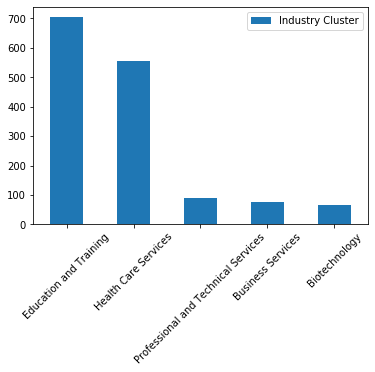

In [12]:
doc_industry_matplotlib = doc_top_industry.plot.bar()
plt.xticks(rotation=45)

In [13]:
doc_top_jobs = doc['SOC Title'].value_counts()
doc_top_jobs = pd.DataFrame(doc_top_jobs)
doc_top_jobs = doc_top_jobs.head()
doc_top_jobs

,SOC Title
Lawyers,176
Pharmacists,113
"Clinical, Counseling, and School Psychologists",103
"Medical Scientists, Except Epidemiologists",84
Physical Therapists,60


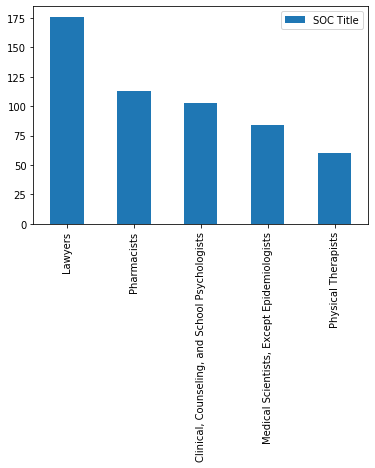

In [14]:
doc_jobs_matplotlib = doc_top_jobs.plot.bar()

In [15]:
a = doc[doc['SOC Title'] == 'Lawyers']
a = a["Median Annual Wage"].median(axis=0)
a = pd.DataFrame({"Wage (Median)":[a]})
a = a.rename(index={0: "Lawyers"})
a

,Wage (Median)
Lawyers,137046.0


In [16]:
b = doc[doc['SOC Title'] == 'Pharmacists']
b = b["Median Annual Wage"].median(axis=0)
b = pd.DataFrame({"Wage (Median)":[b]})
b = b.rename(index={0: "Pharmacists"})
b

,Wage (Median)
Pharmacists,140940.0


In [17]:
c = doc[doc['SOC Title'] == 'Clinical, Counseling, and School Psychologists']
c = c["Median Annual Wage"].median(axis=0)
c = pd.DataFrame({"Wage (Median)":[c]})
c = c.rename(index={0: "Clinical, Counseling, and School Psychologists"})
c

,Wage (Median)
"Clinical, Counseling, and School Psychologists",87253.0


In [20]:
d = doc[doc['SOC Title'] == 'Medical Scientists, Except Epidemiologists']
d = d["Median Annual Wage"].median(axis=0)
d = pd.DataFrame({"Wage (Median)":[d]})
d = d.rename(index={0: "Medical Scientists"})
d

,Wage (Median)
Medical Scientists,95781.0


In [21]:
e = doc[doc['SOC Title'] == 'Physical Therapists']
e = e["Median Annual Wage"].median(axis=0)
e = pd.DataFrame({"Wage (Median)":[e]})
e = e.rename(index={0: "Physical Therapists"})
e

,Wage (Median)
Physical Therapists,92333.5


In [22]:
frames = [a, b, c, d, e]
result = pd.concat(frames)
result

,Wage (Median)
Lawyers,137046.0
Pharmacists,140940.0
"Clinical, Counseling, and School Psychologists",87253.0
Medical Scientists,95781.0
Physical Therapists,92333.5
